# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
pip install ucimlrepo

In [2]:
import os
import pandas as pd
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [113]:
# Ambil dataset
car_evaluation = fetch_ucirepo(id=19)

# Ambil fitur dan target
X = car_evaluation.data.features
y = car_evaluation.data.targets

# Gabungkan fitur dan target ke satu DataFrame
df = pd.concat([X, y], axis=1)

# Tampilkan DataFrame
df.sample(10)

,buying,maint,doors,persons,lug_boot,safety,class
1079,med,high,5more,more,big,high,acc
1116,med,med,3,4,small,low,unacc
1117,med,med,3,4,small,med,acc
1373,low,vhigh,4,more,med,high,acc
459,high,vhigh,3,2,small,low,unacc
682,high,med,3,2,big,med,unacc
495,high,vhigh,4,4,small,low,unacc
1621,low,low,2,2,small,med,unacc
326,vhigh,low,2,2,small,high,unacc
960,med,vhigh,5more,4,big,low,unacc


In [114]:
df.to_csv('raw_dataset_car_evaluation.csv', index=False)
df = pd.read_csv('raw_dataset_car_evaluation.csv')

In [115]:
print(df.shape)

(1728, 7)


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [117]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


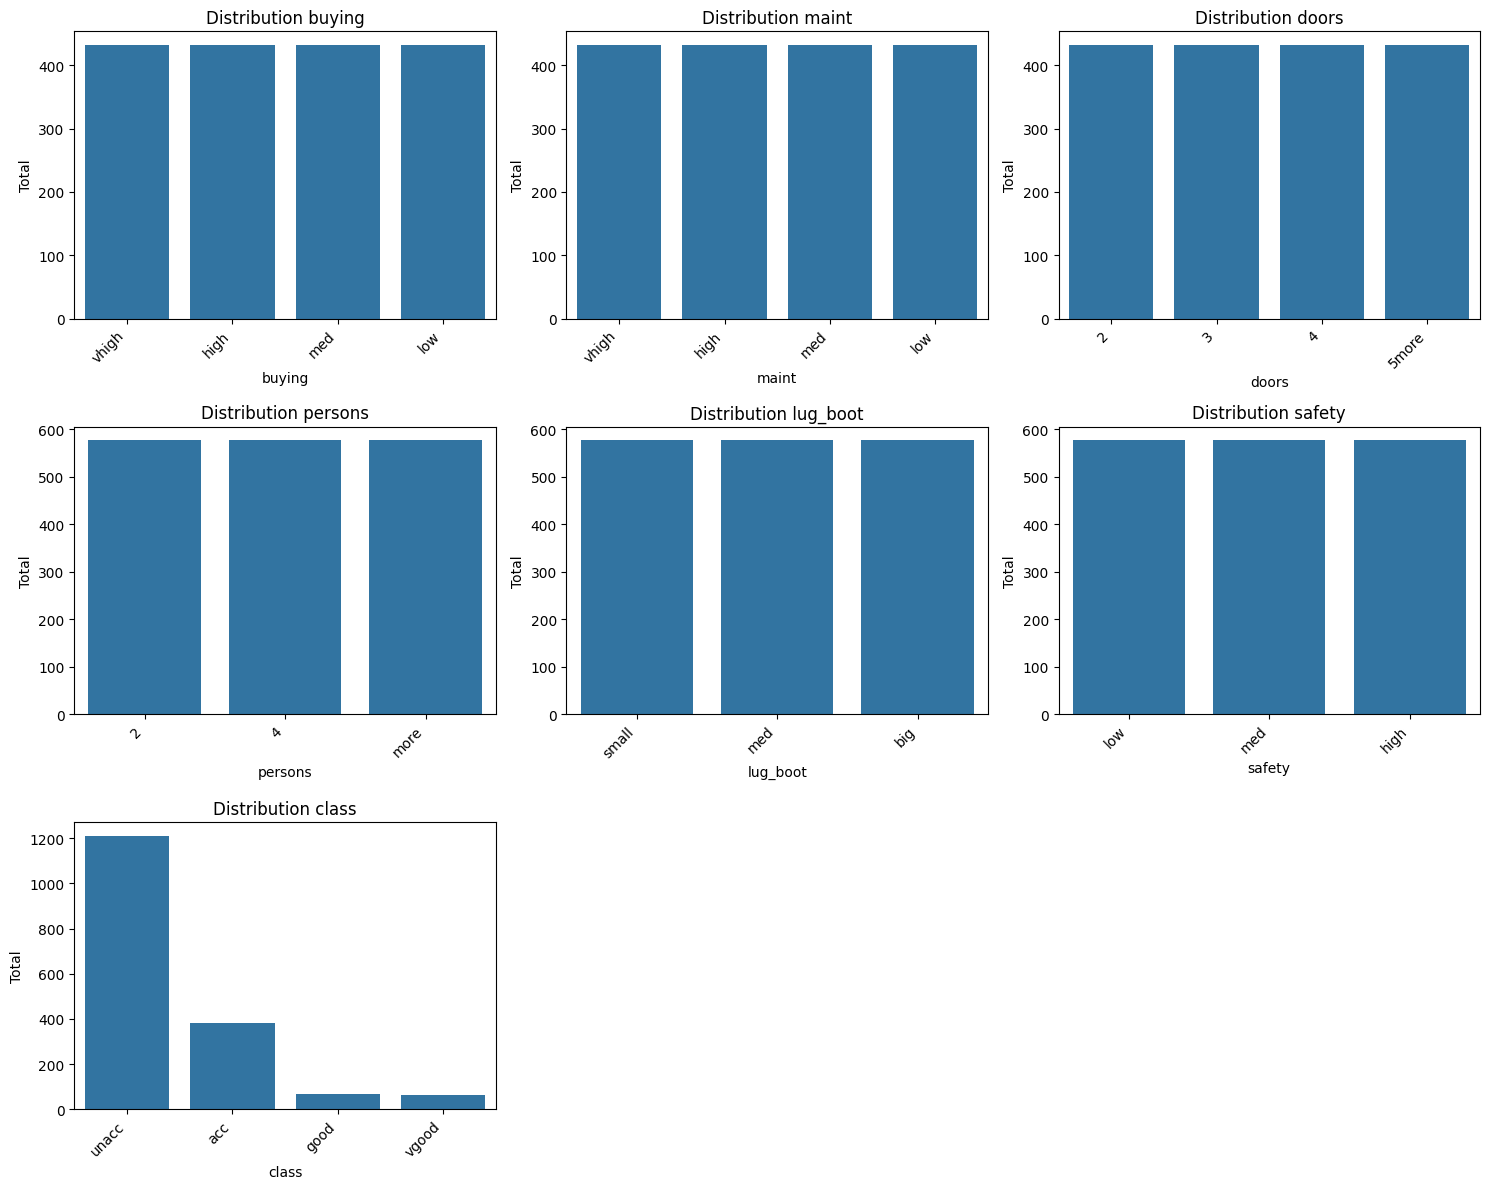

In [118]:
# Ambil semua kolom bertipe kategorik
categorical_columns = df.select_dtypes(include='object').columns

num_cols_cat = len(categorical_columns)

# Menentukan ukuran grid untuk subplot
ncols_cat = 3
nrows_cat = math.ceil(num_cols_cat / ncols_cat)

# Set ukuran plot
plt.figure(figsize=(15, 12))

# Loop visualisasi untuk tiap kolom
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(nrows_cat, ncols_cat, i)
    status_counts = df[col].value_counts()
    sns.barplot(x=status_counts.index, y=status_counts.values)
    plt.title(f'Distribution {col}')
    plt.xlabel(col)
    plt.ylabel('Total')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [119]:
# Pisahkan fitur dan target
X = df.drop('class', axis=1)
y = df['class']

# Daftar kolom kategorikal
categorical_features = X.columns.tolist()

# Pipeline untuk fitur kategorikal: imputasi + encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# ColumnTransformer untuk semua fitur
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ]
)

# # Pipeline akhir
# pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor)
# ])

In [120]:
# Pisahkan fitur dan target
X = df.drop('class', axis=1)
y = df['class']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [121]:
# 5.4 Terapkan preprocessing
X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)
print(f'X_train shape: {X_train_proc.shape}')
print(f'X_test shape: {X_test_proc.shape}')

X_train shape: (1382, 21)
X_test shape: (346, 21)


In [122]:
# === Konfigurasi ===
output_dir = './car_evaluation_dataset_preprocessing'
label_column = 'class'  # ganti sesuai kebutuhan
train_filename = 'car_evaluation_train_preprocessed.csv'
test_filename = 'car_evaluation_test_preprocessed.csv'

# Buat folder output jika belum ada
os.makedirs(output_dir, exist_ok=True)

# Ambil nama fitur setelah preprocessing
feature_names = preprocessor.get_feature_names_out()

# Fungsi untuk menyimpan dataset
def save_preprocessed_data(X_proc, y, filename):
    print(f"Inside save_preprocessed_data — X_proc shape: {X_proc.shape}")
    df = pd.DataFrame(X_proc, columns=feature_names)
    df[label_column] = y.values
    path = os.path.join(output_dir, filename)
    df.to_csv(path, index=False)
    return path

In [123]:
# Simpan train dan test
train_path = save_preprocessed_data(X_train_proc, y_train, train_filename)
test_path = save_preprocessed_data(X_test_proc, y_test, test_filename)

print(f"Export selesai:\n- {train_path}\n- {test_path}")

Inside save_preprocessed_data — X_proc shape: (1382, 21)
Inside save_preprocessed_data — X_proc shape: (346, 21)
Export selesai:
- ./car_evaluation_dataset_preprocessing/car_evaluation_train_preprocessed.csv
- ./car_evaluation_dataset_preprocessing/car_evaluation_test_preprocessed.csv
